**SPOTIFY FEATURES ANALYSIS**

Spotify is the world's largest audio streaming platform with various features, including sharing songs freely and viewing the lyrics while playing the songs.There is also a powerful song search engine available as well as a recommendation system which helps you listen to more of what you love.Most music lovers listen to songs on Spotify.

**Objective** :Spotify Popularity is an extremely important value that Spotify uses internally to rank all artists and tracks on a scale from 0 to 100.Our objective is to know about the factors affecting the song popularity and explore the relationship between the audio features of songs.Knowing about the attributes that affects the song popularity beforehand helps the musicians to know whether their song has the potential to be popular on a platform like Spotify.

**Dataset** :I am using the dataset (https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db) from Kaggle. The dataset consists of 232725 records across 18 fields.The dataset includes genres, track names ,track id , popularity and various features like energy,loudness etc...

**Data Analysis** : For data analaysis we will be using hypothesis testing using independent 2 sample T-Tests.Pearsonr test and visualization will be used to find the correlation.
 

**Importing Data**

In [ ]:
# mounting GDrive to connect csv file
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# import libraries
import numpy as np
import pandas as pd  
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import dataset
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,4-May,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4-Apr,0.390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

**Checking for Missing Values**

In [ ]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

**Correaltion Heatmap**

Now we will create our first visualization, a correlation map. First we will drop some unwanted columns and apply the pearson correlation method.

We will set the figure size for the correlation map to (14,6). We will use the heatmap() function to create our correlation map, plus we will set the annotation = True that will write the data value in each cell. We will set fmt=" .1g"; this is string formatting quotes used when adding annotations. Here cmap stands for the color map.

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'acousticness'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'liveness'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'valence')]

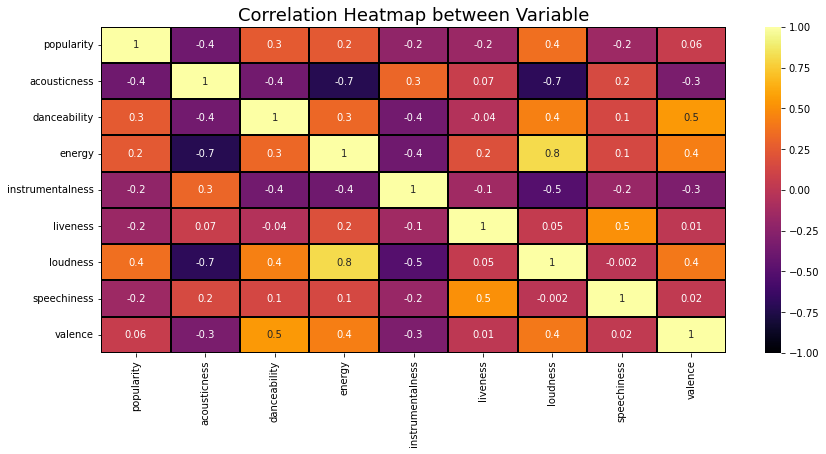

In [ ]:
#Using Pearson corelation
corr_df = df.drop(['genre','artist_name','track_name','track_id','key','mode','tempo','time_signature','duration_ms'],axis=1).corr(method="pearson")
plt.figure(figsize=(14,6))
map = sns.heatmap(corr_df, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='inferno', linewidths=1, linecolor='Black')
map.set_title('Correlation Heatmap between Variable',fontsize=18)
map.set_xticklabels(map.get_xticklabels(), rotation=90)

On the right side, we can see a scale ranging from -1 to +1. Here -1 denotes the variables that have the least or negative correlation, while the values above 0.0 denote the variables with a positive correlation. 


**Hypothesis 1:Are the popularity of pop songs and jazz songs the same?**

Ho (null): There is statistically no significant difference in the mean popularity of pop songs and jazz songs.       
Ha (alternate): There is statistically significant difference in the mean popularity of pop songs and jazz songs.


 

In [ ]:
# Creating two groups of pop songs and jazz songs we are testing and declaring variables to hold those new dataframes
pop_songs = df.loc[(df['genre']== "Pop")]
jazz_songs = df.loc[(df['genre']== "Jazz")]
# Independent  sample t-test method to check the significance of popularity between pop and jazz songs
ttest_popularity=stats.ttest_ind(pop_songs['popularity'],jazz_songs['popularity'])
print(ttest_popularity)

Ttest_indResult(statistic=207.8893833629851, pvalue=0.0)


With p value equals to zero , we reject the null hypothesis which states that there is statistically no significant difference in the mean popularity of pop songs and jazz songs .Let's look at the 95% confidence interval of where the difference lies.


In [ ]:
#defining a function to provide the 95% confidence interval ranges for two give variables and their difference in mean 
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return ("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [ ]:
#95% confidence level 
get_95_ci(pop_songs['popularity'],jazz_songs['popularity'])

'The difference in means at the 95% confidence interval (two-tail) is between -26.00901735587213 and -25.523550525134713.'

We reject the null. With 95% confidence, pop songs have on average between 26.01 and 25.52 higher popularity than jazz songs. This confirms that there is statistically significance difference in the mean popularity of pop songs and jazz songs.

**Hypothesis 2:	How does the energy affect the danceability of songs?**

Ho (null): There is no correlation between the energy and danceability in songs.

Ha (alternate): There is a correlation between the energy and danceability in songs.




In [ ]:
# The pearson coefficient allows us to see the correlation between energy and danceability in songs.
stats.pearsonr(df['energy'], df['danceability'])

(0.32580699188301593, 0.0)

With correlation coefficient between energy and danceability being 0.325 with a p value less than 0.05, there is a correlation  between energy and danceabilityin songs.


930


[Text(0.5, 1.0, 'Energy Vs Danceability Correlation')]

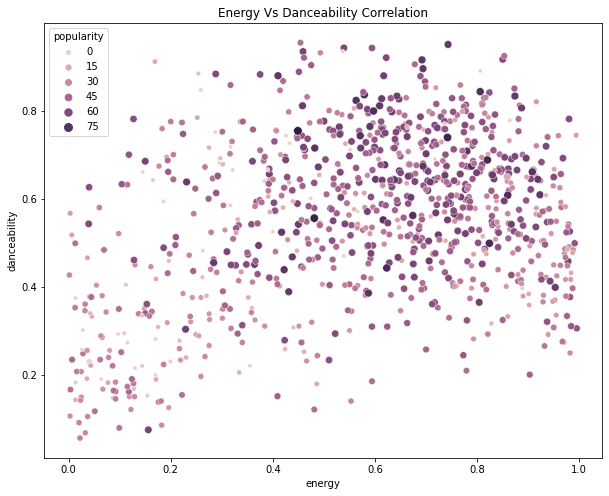

In [ ]:
# The below scatterplot will allow us to visualize the relationship between energy and danceability in songs.
sample_df=df.sample(int(0.004*len(df)))
print(len(sample_df))
plt.figure(figsize=(10,8))
sns.scatterplot(x='energy', y='danceability',hue='popularity',size='popularity',data=sample_df).set(title ="Energy Vs Danceability Correlation")

Its clear from the above visualization that there is a positive correlation between energy and danceability in songs.Also we can see that the most popular songs have high energy and danceability.


**Hypothesis 3:Is there any correlation between liveness and valence?**

Ho (null): There is no correlation between the loudness and valence in songs.

Ha (alternate): There is a  correlation between the loudness and valence in songs.


In [ ]:
# The pearson coefficient allows us to see the correlation between liveness and valence in songs.
stats.pearsonr(df['liveness'], df['valence'])

(0.011804373546822738, 1.2352816196465933e-08)

With correlation coefficient between loudness and valence being 0.011 with a p value less than 0.05,we reject the null hypothesis.

930


[Text(0.5, 1.0, 'Liveness Vs Valence Correlation')]

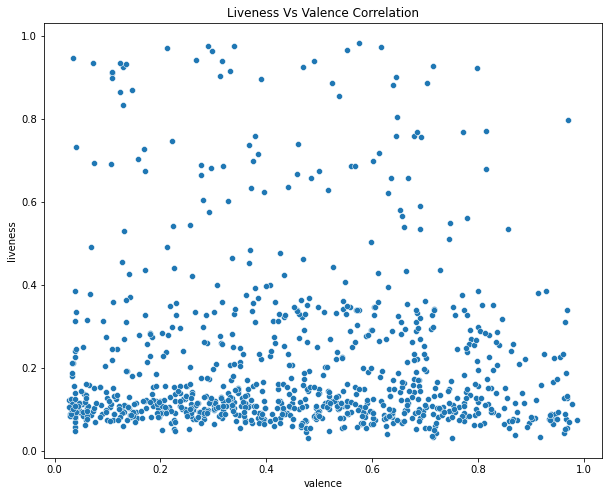

In [ ]:
# This is a scatterplot that will allow us to visualize the relationship between liveness and valence in songs.
sample_df=df.sample(int(0.004*len(df)))
print(len(sample_df))
plt.figure(figsize=(10,8))
sns.scatterplot(x='valence', y='liveness',data=sample_df).set(title ="Liveness Vs Valence Correlation")

Even though we got positive correlation coefficient,there doesn't seems to a be a strong linear relationship with liveness and valence.

**Hypothesis 4 :	Does the loudness have an impact on the energy of the songs?**

Ho (null): There is no correlation between the energy and loudness in songs.

Ha (alternate): There is a correlation between the energy and loudness in songs.



In [ ]:
# The pearson coefficient allows us to see the correlation between liveness and valence in songs.
stats.pearsonr(df['energy'], df['loudness'])

(0.8160879669987331, 0.0)

With correlation coefficient between energy and loudness being 0.816 with a p value less than 0.05, there is significant positive relation between energy and loudness in songs.

930


[Text(0.5, 1.0, 'Loudness Vs Energy Corelation')]

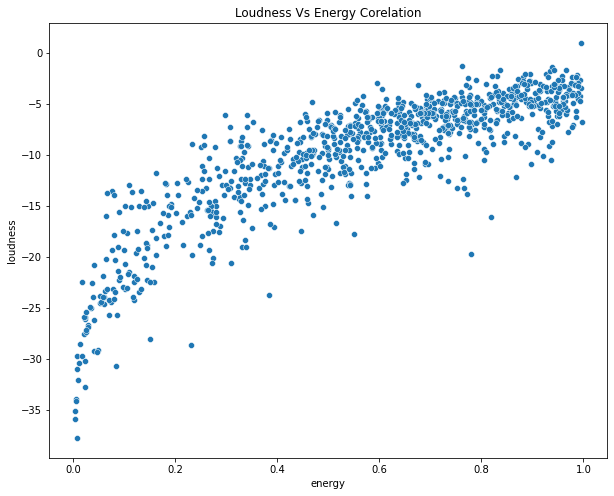

In [ ]:
# This is a scatterplot that will allow us to visualize the relationship between liveness and valence in songs..
sample_df=df.sample(int(0.004*len(df)))
print(len(sample_df))
plt.figure(figsize=(10,8))
sns.scatterplot(x='energy', y='loudness',data=sample_df).set(title ="Loudness Vs Energy Corelation")

From the above scatterplot , its clear that there is a strong positive correlation between loudness and energy of songs . 








**Hypothesis 5: Does energy have an impact on the popularity of songs?**

Ho (null): There is statistically no significant difference in popularity between the songs with high energy levels and songs with low energy levels.

Ha (alternate): There is statistically significant difference in popularity between the songs with high energy levels and songs with low energy levels.



In [ ]:
# Creating two groups of high_energy_songs and low_energy_songs we are testing and declaring variables to hold those new dataframes
high_energy_songs = df.loc[(df['energy']>= 0.5)]
low_energy_songs = df.loc[(df['energy']< 0.5)]
# Independent  sample t-test method to check the significance of popularity between pop and jazz songs
ttest_popularity=stats.ttest_ind(high_energy_songs['popularity'],low_energy_songs['popularity'])
print(ttest_popularity)


Ttest_indResult(statistic=122.57978358782493, pvalue=0.0)


With p value equals to zero , we reject the null hypothesis which states that there is statistically no significant difference in the mean popularity of songs with high energy levels and songs with low energy levels. .Let's look at the 95% confidence interval of where the difference lies.

In [ ]:
#defining a function to provide the 95% confidence interval ranges for two give variables and their difference in mean 
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return ("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [ ]:
#95% confidence level 
get_95_ci(high_energy_songs['popularity'],low_energy_songs['popularity'])

'The difference in means at the 95% confidence interval (two-tail) is between -9.44006701893239 and -9.132526067732746.'

We can see that the difference in mean popularity between songs with high energy levels versus songs with low energy levels , is between roughly 9.44 and 9.132. Let's visulize that with a box plot.

[Text(0.5, 1.0, 'Popularity of high energy songs vs low energy songs')]

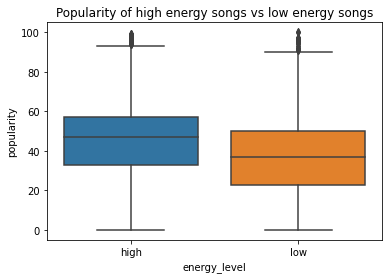

In [ ]:
df['energy_level']=['high'if x>=0.5 else 'low' for x in df['energy']]
sns.boxplot(y="popularity",x="energy_level",data=df).set(title ="Popularity of high energy songs vs low energy songs")

We can see from the above plot that the popularity of high energy songs are higher than low energy songs which supports our hypothesis testing.

**CONCLUSION** 

* Hypothesis 1: There is a significant statistical difference in mean popularity of pop songs and jazz songs.We found out that different genres of songs can have different popularity.
* Hypothesis 2: There is a positive correlation between energy and danceability in songs.
* Hypothesis 3:Even though there is a positive correlation between liveness and valence in songs, they dont have a strong linear relationship.
* Hypothesis 4: There is a strong correlation between energy and loudness in songs. 
In the second, third and fourth analysis we created interesting visualizations and extracted useful insights about the correlations between the various variables of songs.
* Hypothesis 5: There is significant statistical difference in popularity between the songs with high energy levels and songs with low energy levels.
From our last analysis , we found how energy levels can impact the popularity of songs.











**RECOMMONDATIONS** 


   **Most popular songs tends to have high energy, loudness and dancebilty features**.**People are enjoying pop songs more when compared to other genres of songs**.
 
*   Musicians should study more of the popular audio features while composing their songs.
*   Selecting a well-liked genre will help the music to be more popular .
*   The higher the popularity index, the more likely Spotify will recommmend the song to the listeners.










**LIMITATIONS**

 Apart from music, marketing & social media platforms etc , they all play a role in making a song popular in Spotify.


